# Problem Set 1 - Helen Chen
### 1. Plotting virus assembly trajectories
- 'CapsidAssemblyTrajectories.zip' contains trajectories from the hepatitis B virus (HBV) capsid assembling
- Each file corresponds to a trajectory of growth of a single capsid
- Each file name is formatted GB-{$g_b$}_{$s$}.txt
  - GB = binding strength gB of the capsid proteins (in units of the thermal energy, kBT)
  - s = the random number seed
- 3 columns in each file: 
  1. **the time step (in some non-dimensionalized units)**
  2. number of vertices in a graph structure description of the partial capsid
  3. **number of dimer subunits in the partial capsid**

**a.** unix commands practice\
**b.** unix commands practice\
**c.**
  - Plot capsid size (column 3) as a function of time (column 1)
  - choose *any one* trajectory for each of gB= −6.6,−7.0,−7.2,−7.8
  - Make a legend that labels gb for each curve.

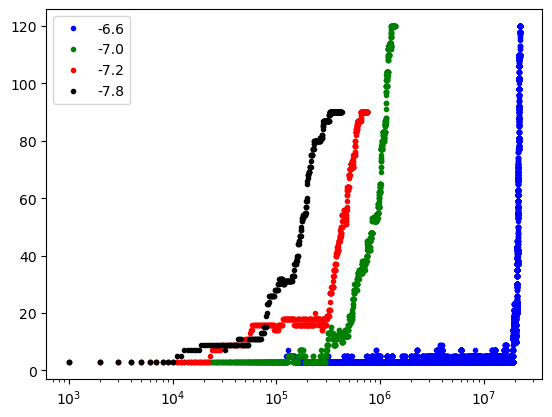

In [23]:
import matplotlib.pyplot as plt
import numpy as np

class HBVTrajectory:
    def __init__(self, gB: float, color: str):
        self.gB: float = gB
        self.filepath: str = "trajectories/GB-" + str(gB) + "_7.txt"
        self.color:str = color

trajectories: list[HBVTrajectory] = [
    HBVTrajectory(-6.6, "b"),
    HBVTrajectory(-7.0, "g"),
    HBVTrajectory(-7.2, "r"),
    HBVTrajectory(-7.8, "k"),
]

for trajectory in trajectories: 
    with open(trajectory.filepath) as file:
        lines: list[str] = file.readlines()
        lines = lines[1:]
        time_points: np.ndarray = np.empty(len(lines), dtype=int)
        dimer_points: np.ndarray = np.empty(len(lines), dtype=int)
        for i, line in enumerate(lines): 
            time_points[i], _, dimer_points[i] = line.split(" ")
        plt.plot(time_points, dimer_points, ".", label=trajectory.gB, color=trajectory.color)

plt.ticklabel_format(style='plain')
plt.semilogx()
plt.legend()

### 2. SIR Model
**a.**  Show that if we define a dimensionless time, $\bar{t} = \gamma t$, the equations can be written in a simpler form: 

The following assumes that $\frac{1}{\gamma}\cdot\frac{dS}{dt}=\frac{dS}{d(\gamma t)} = \frac{dS}{d\bar{t}}$
$$R_0 = \frac{\beta}{\gamma}$$
$$
\frac{dS}{dt} = -\beta SI \quad\rightarrow\quad
\frac{1}{\gamma}\cdot\frac{dS}{dt} = -\frac{\beta}{\gamma} SI \quad\rightarrow\quad
\frac{dS}{d(\gamma t)} = -R_0 SI = \frac{dS}{d\bar{t}}
$$
$$
\frac{dI}{dt} = \beta SI - \gamma I \quad\rightarrow\quad
\frac{1}{\gamma}\cdot\frac{dI}{dt} = \frac{\beta}{\gamma} SI - \frac{\gamma}{\gamma} I \quad\rightarrow\quad
\frac{dI}{d(\gamma t)} = R_0 SI - I = \frac{dI}{d\bar{t}}
$$
$$
\frac{dR}{dt} = \gamma I \quad\rightarrow\quad
\frac{1}{\gamma}\cdot\frac{dR}{dt} = \frac{\gamma}{\gamma} I \quad\rightarrow\quad
\frac{dR}{d(\gamma t)} = I = \frac{dI}{d\bar{t}}
$$

**b.** Plot the time evolution of each category (on the same plot) for: 
- $R_0 = 10$
- $I(0) = 1.0\times 10^{-5}$
- $S(0) = 1 - I(0)$
- Use the simple Euler algorithm in tutorial

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


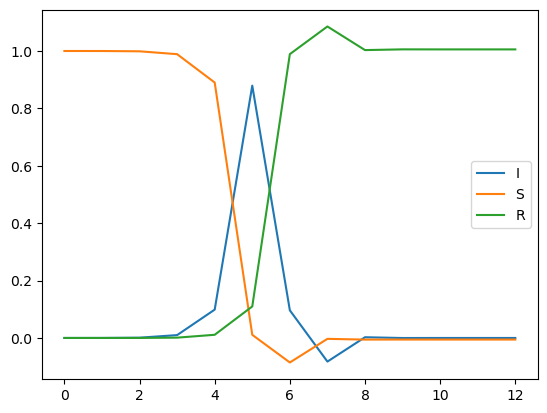

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Initializing variables
R0: int = 10 # basic reproductive ratio
I_var: float = 0.00001
S_var: float = 1.0 - I_var
R_var: float = 0.0
tbar: float = 0.0

# Time progression variables
delta_time: float = 1
total_time: float = delta_time*12

# Set arrays to store the data at each time step
num_time_steps: int = int(total_time/delta_time) + 1
S_array: np.ndarray = np.zeros(num_time_steps)
I_array: np.ndarray = np.zeros(num_time_steps)
R_array: np.ndarray = np.zeros(num_time_steps)
time_array: np.ndarray = np.zeros(num_time_steps)

# Loop over each time increment
for i in range(num_time_steps):
    # Add the current numbers to our storage arrays.
    S_array[i] = S_var
    I_array[i] = I_var
    R_array[i] = R_var
    time_array[i] = tbar

    # Calculate the change in each variable over the delta_time
    delta_S: float = -R0*S_var*I_var
    delta_I: float = R0*S_var*I_var - I_var
    delta_R: float = I_var

    # Update the variables according to the change
    S_var += delta_S
    I_var += delta_I
    R_var += delta_R
      
    # Increment time
    tbar += delta_time

print(time_array)
plt.plot(time_array, I_array, label="I")
plt.plot(time_array, S_array, label="S")
plt.plot(time_array, R_array, label="R")
plt.legend()

**c.** Explore the idea of ‘flattening the curve’
- Plot the epidemic curve for $R_0 = 2.0, 1.5, 0.9$
- Epidemic curve = $\frac{dR(\bar{t})}{d\bar{t}} = I$
- Also make a plot of the number of recovered individuals as a function of time

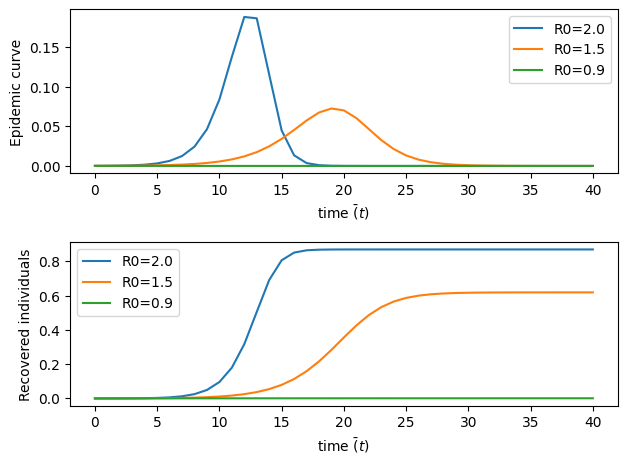

In [7]:
import matplotlib.pyplot as plt
import numpy as np



def flatten_curve() -> None:
    # Initializing variables
    I_init: float = 0.0001
    S_init: float = 1.0 - I_init
    R_init: float = 0.0

    _, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_ylabel("Epidemic curve")
    ax1.set_xlabel("time $\\bar(t)$")
    ax2.set_ylabel("Recovered individuals")
    ax2.set_xlabel("time $\\bar(t)$")
    plt.tight_layout()

    for R0_var in [2.0, 1.5, 0.9]:
        curve_data: dict[str:np.ndarray] = simulate(R0_var, S_init, I_init, R_init, 40)
        ax1.plot(curve_data["time_array"], curve_data["I_array"], label="R0="+str(R0_var))
        ax2.plot(curve_data["time_array"], curve_data["R_array"], label="R0="+str(R0_var))

    ax1.legend()
    ax2.legend()
    

def simulate(R0: float, S_init: float, I_init: float, R_init: float, ticks: int) -> dict[str:np.ndarray]:

    # Initializing variables
    S_var: float = S_init
    I_var: float = I_init
    R_var: float = R_init
    tbar: float = 0.0

    # Time progression variables
    delta_time: float = 1
    total_time: float = delta_time*ticks

    # Set arrays to store the data at each time step
    num_time_steps: int = int(total_time/delta_time) + 1
    S_array: np.ndarray = np.zeros(num_time_steps)
    I_array: np.ndarray = np.zeros(num_time_steps)
    R_array: np.ndarray = np.zeros(num_time_steps)
    time_array: np.ndarray = np.zeros(num_time_steps)

    # Loop over each time increment
    for i in range(num_time_steps):
        # Add the current numbers to our storage arrays.
        S_array[i] = S_var
        I_array[i] = I_var
        R_array[i] = R_var
        time_array[i] = tbar

        # Calculate the change in each variable over the delta_time
        delta_S: float = -R0*S_var*I_var
        delta_I: float = R0*S_var*I_var - I_var
        delta_R: float = I_var

        # Update the variables according to the change
        S_var += delta_S
        I_var += delta_I
        R_var += delta_R
        
        # Increment time
        tbar += delta_time
    
    return {
        "S_array": S_array,
        "I_array": I_array,
        "R_array": R_array,
        "time_array": time_array,
    }

flatten_curve()